In [ ]:
# !pip install pandas
# !pip install matplotlib

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [5]:
def plot_yes_no_chart(column, title):
    data = df[column]
    colors = ['blue', 'red']

    plt.figure(figsize=(10, 6))
    ax = data.value_counts().plot(kind='barh', color=colors) 
    plt.title(title)
    plt.xticks(rotation=0)

    for i, count in enumerate(data.value_counts()):
        ax.text(count, i, str(count), va='center', fontsize=12, fontweight='bold')

    plt.show()
    plt.close()

In [20]:
def plot_scores_distribution_chart(column, title, colors):
    score_range = range(1, 6)
    score_counts = df[column].value_counts().reindex(score_range, fill_value=0)
    cmap = LinearSegmentedColormap.from_list('palette', colors)

    plt.figure(figsize=(10, 6))
    ax = score_counts.plot(kind='bar', color=cmap(np.linspace(0, 1, 5)))
    average_score = df[column].mean()
    plt.title(f'{title} - Ocjena {average_score}')

    for i, count in enumerate(score_counts):
        ax.text(i, count, str(count), ha='center', va='bottom')

    plt.show()
    plt.close()

In [83]:
def plot_analysis_distribution_chart(column, title, colors, xlabel=None, ylabel=None, legend=None):
    column_range = range(1, 11)
    column_counts = df_all[column].value_counts().reindex(column_range, fill_value=0)
    cmap = LinearSegmentedColormap.from_list('palette', colors)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(column_counts)), column_counts, color=cmap(np.linspace(0, 1, 10)))

    for i, count in enumerate(column_counts):
        plt.text(i, count, str(count), ha='center', va='bottom')
    
    if legend is not None and len(legend) == len(column_range):
        plt.legend(bars, legend, loc=(0.0, -0.6))

    plt.title(title)
    plt.xticks(range(len(column_range)), column_range)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    plt.close()

In [7]:
df = pd.read_csv('./scores/scores.csv', sep=';')

In [16]:
df_all = pd.read_csv('./scores/answer-analysis.csv', sep=';')

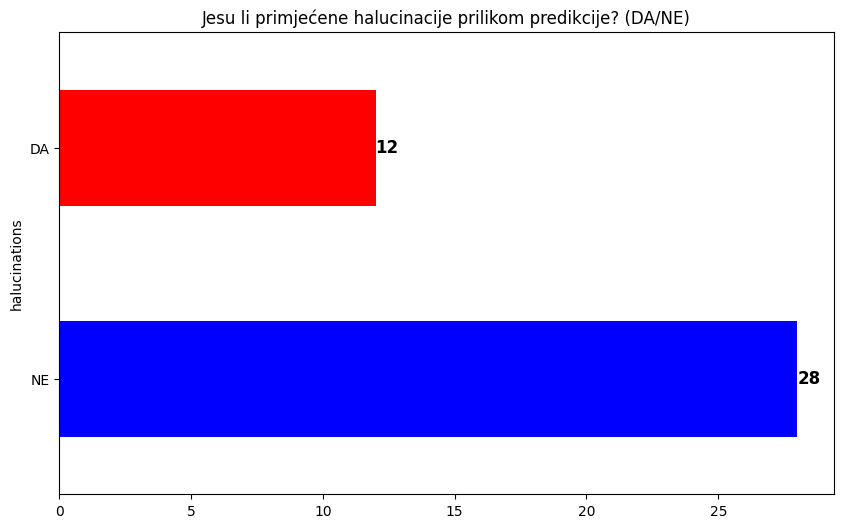

In [8]:
plot_yes_no_chart('halucinations', 'Jesu li primjećene halucinacije prilikom predikcije? (DA/NE)')

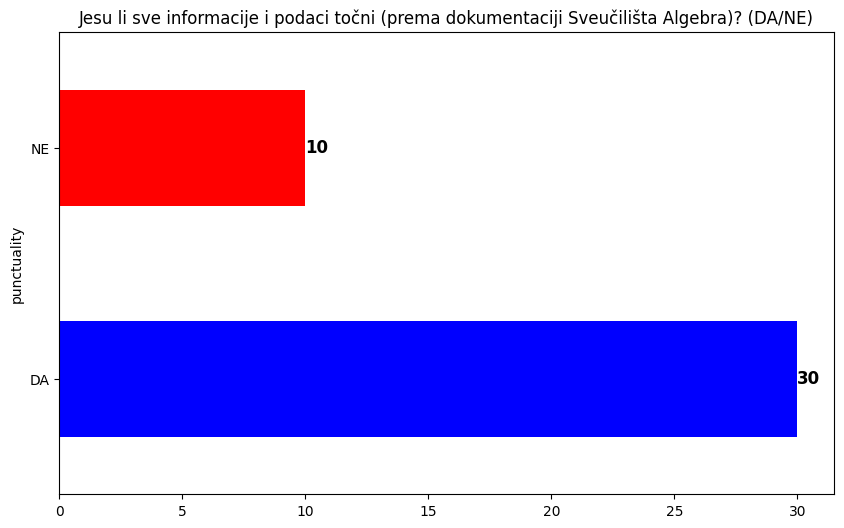

In [9]:
plot_yes_no_chart('punctuality', 'Jesu li sve informacije i podaci točni (prema dokumentaciji Sveučilišta Algebra)? (DA/NE)')

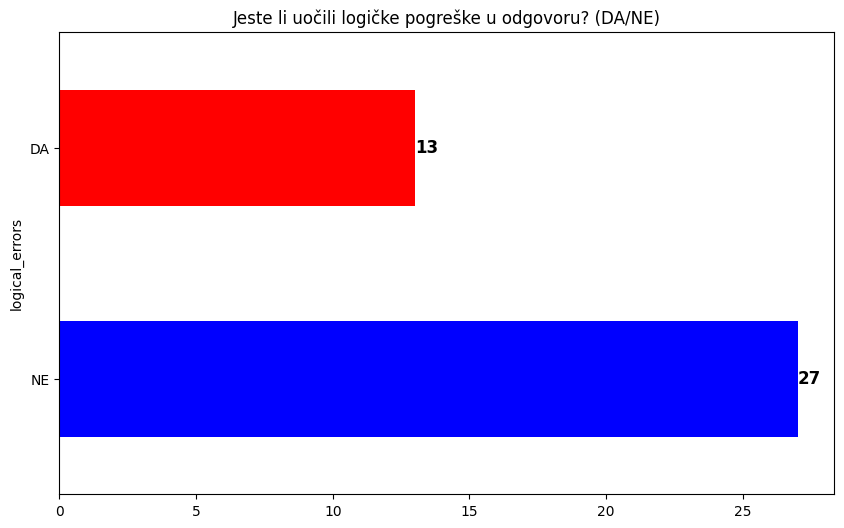

In [57]:
plot_yes_no_chart('logical_errors', 'Jeste li uočili logičke pogreške u odgovoru? (DA/NE)')

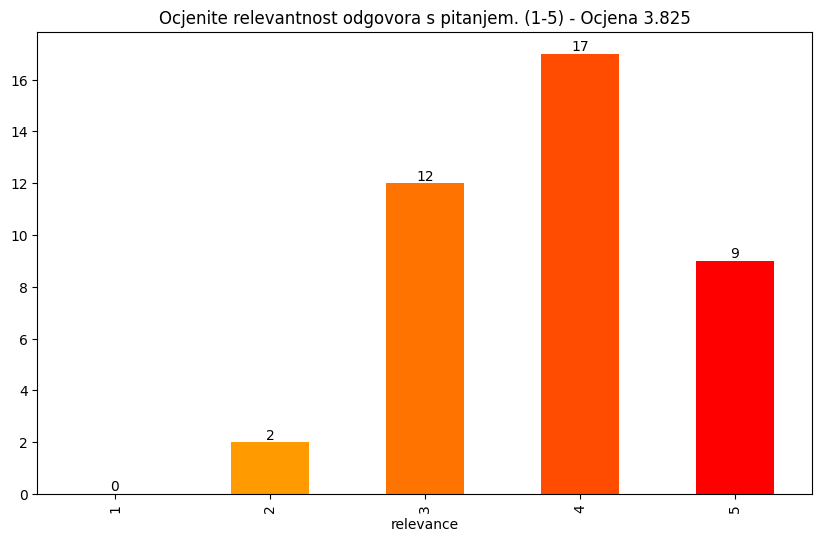

In [10]:
orange_palette = ['#ffc100', '#ff9a00', '#ff7400', '#ff4d00', '#ff0000']
plot_scores_distribution_chart('relevance', 'Ocjenite relevantnost odgovora s pitanjem. (1-5)', orange_palette)

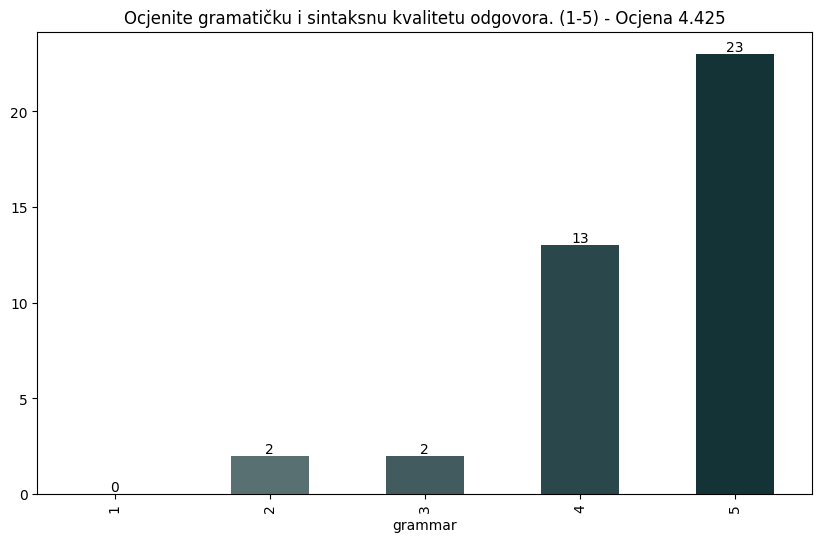

In [11]:
blue_green_palette = ['#718487', '#597073', '#425b5e', '#2a474b', '#133337']
plot_scores_distribution_chart('grammar', 'Ocjenite gramatičku i sintaksnu kvalitetu odgovora. (1-5)', blue_green_palette)

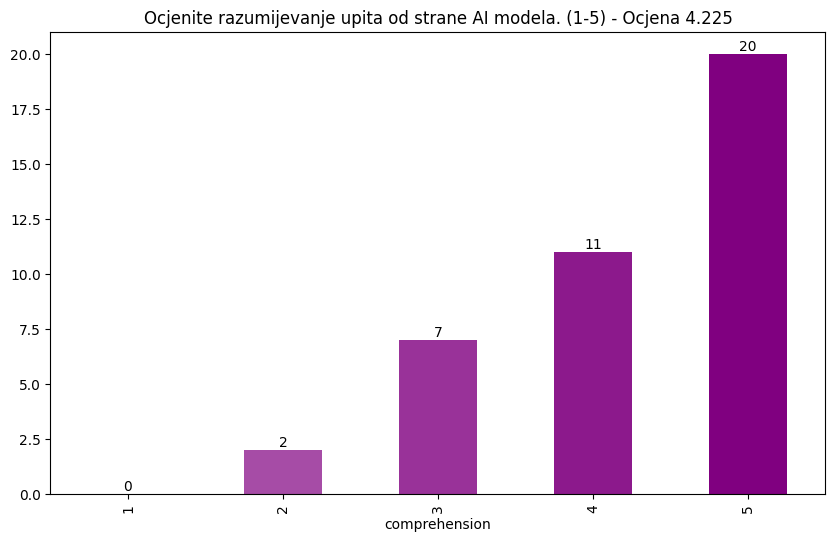

In [12]:
purple_palette = ['#b266b2', '#a64ca6', '#993299', '#8c198c', '#800080']
plot_scores_distribution_chart('comprehension', 'Ocjenite razumijevanje upita od strane AI modela. (1-5)', purple_palette)

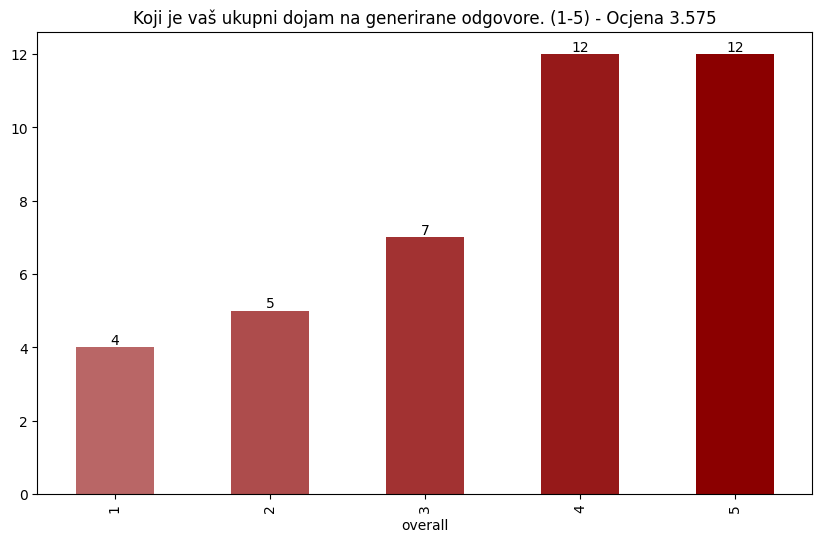

In [13]:
red_palette = ['#b96666', '#ad4c4c', '#a23232', '#961919', '#8b0000']
plot_scores_distribution_chart('overall', 'Koji je vaš ukupni dojam na generirane odgovore. (1-5)', red_palette)

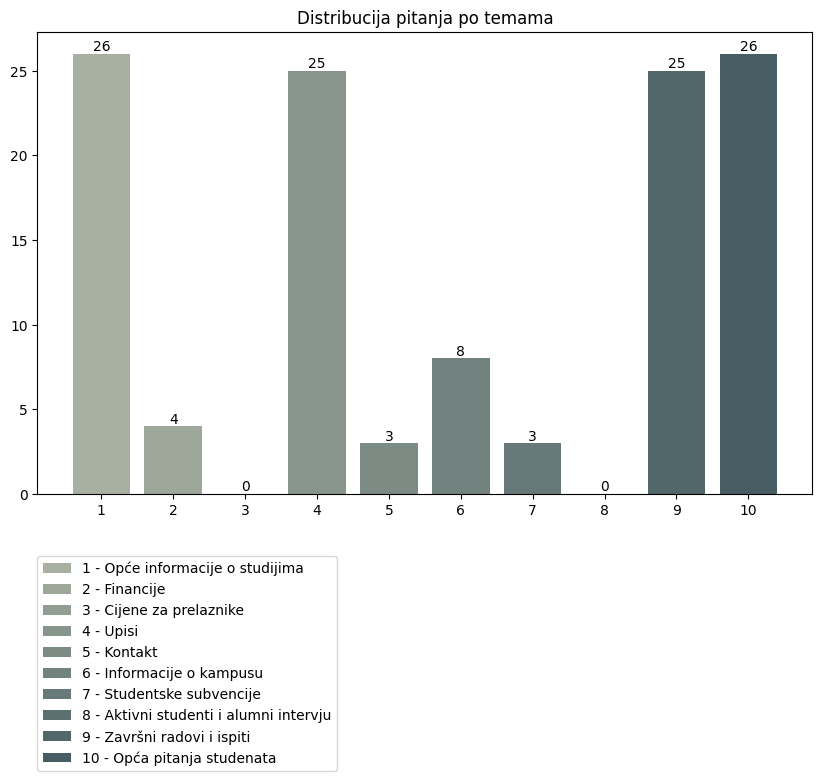

In [85]:
grey_green_palette = ['#a8b0a1', '#9da79a', '#929e93', '#88958c', '#7d8b85', '#72827e', '#677978', '#5c7071', '#51676a', '#465e63']
legend_theme = [
    '1 - Opće informacije o studijima',
    '2 - Financije',
    '3 - Cijene za prelaznike',
    '4 - Upisi',
    '5 - Kontakt',
    '6 - Informacije o kampusu',
    '7 - Studentske subvencije',
    '8 - Aktivni studenti i alumni intervju',
    '9 - Završni radovi i ispiti',
    '10 - Opća pitanja studenata'
]

plot_analysis_distribution_chart('Theme', 'Distribucija pitanja po temama', grey_green_palette, legend=legend_theme)

In [94]:
df_incorrect = df_all[df_all['Correctness']=='NO'][df_all['Question relevant']=='YES']

/tmp/ipykernel_15594/1065247315.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_incorrect = df_all[df_all['Correctness']=='NO'][df_all['Question relevant']=='YES']
